# Recurrent neural networks (RNN)

# 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## 1.1

Load data and prepare the dataset

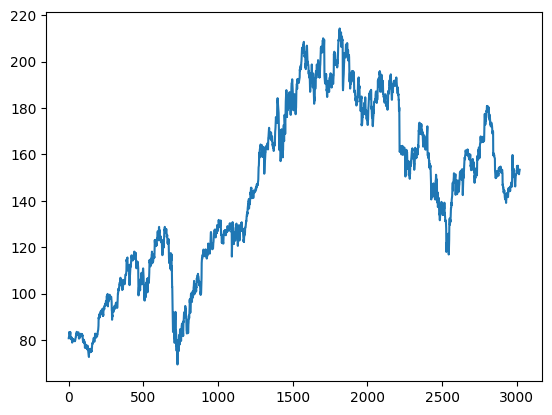

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './IBM_2006-01-01_to_2018-01-01.csv'
df = pd.read_csv(file_path)

# Check for NaN values in dataframe
# print(df.isnull().sum())

# # Drop rows with NaN values
# df.dropna(inplace=True)

# # Replace NaN values with mean of the column
# df.fillna(df.mean(), inplace=False)

plt.plot(df.Low)


# 2

Perform prediction by using feed-forward neural network (sliding window)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Open', 'High', 'Low', 'Volume']]
Y = df['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Set window size
window_size = 10

# Create sequences using a sliding window approach
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i : i + window_size])
    return np.array(sequences)

# Create input-output pairs using the sliding window
X_train_seq = create_sequences(X_train.values, window_size)
X_test_seq = create_sequences(X_test.values, window_size)
y_train_seq = Y_train[window_size:]
y_test_seq = Y_test[window_size:]

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_seq.reshape(-1, X_train_seq.shape[-1]))
X_test_scaled = scaler.transform(X_test_seq.reshape(-1, X_test_seq.shape[-1]))

# Reshape the data for FFNN (samples, features)
X_train_reshaped = X_train_scaled.reshape((X_train_seq.shape[0], window_size * X_train_seq.shape[-1]))
X_test_reshaped = X_test_scaled.reshape((X_test_seq.shape[0], window_size * X_test_seq.shape[-1]))

# Build the FFNN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(window_size * X_train_seq.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train_seq, epochs=20, batch_size=32)

# Make predictions
predictions = model.predict(X_test_reshaped)

# Evaluate the model - MSE and R2 Score
mse = mean_squared_error(y_test_seq, predictions)
r2 = r2_score(y_test_seq, predictions)

print("Predicted Stock Price:\n", Y_test)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Epoch 1/20
76/76 [==============================] - 1s 3ms/step - loss: 19976.7344
Epoch 2/20
76/76 [==============================] - 0s 2ms/step - loss: 5663.2100
Epoch 3/20
76/76 [==============================] - 0s 2ms/step - loss: 1713.9286
Epoch 4/20
76/76 [==============================] - 0s 2ms/step - loss: 1700.4001
Epoch 5/20
76/76 [==============================] - 0s 2ms/step - loss: 1684.3782
Epoch 6/20
76/76 [==============================] - 0s 2ms/step - loss: 1666.1914
Epoch 7/20
76/76 [==============================] - 0s 2ms/step - loss: 1649.1454
Epoch 8/20
76/76 [==============================] - 0s 2ms/step - loss: 1626.3403
Epoch 9/20
76/76 [==============================] - 0s 2ms/step - loss: 1601.5801
Epoch 10/20
76/76 [==============================] - 0s 2ms/step - loss: 1578.4891
Epoch 11/20
76/76 [==============================] - 0s 2ms/step - loss: 1557.3715
Epoch 12/20
76/76 [==============================] - 0s 2ms/step - loss: 1539.4823
Epoch 13/20


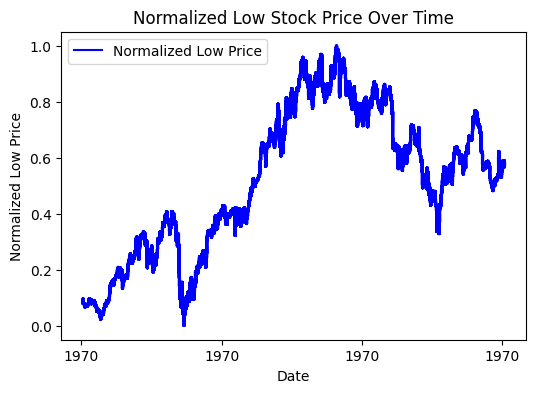

In [ ]:
#FFNN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size + 1):
        sequence = data[i:i + window_size]
        sequences.append(sequence)
    return sequences

file_path = '/content/drive/MyDrive/IBM_2006-01-01_to_2018-01-01.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
df = df.dropna()

# Choose a window size (e.g., 10)
window_size = 10

low_prices = df['Low'].values.reshape(-1, 1)
scaler = MinMaxScaler()

# Create sequences using the sliding window
sequences = create_sequences(low_prices, window_size)

# Reshape sequences to 2D array
reshaped_sequences = np.array(sequences).reshape(-1, window_size)

# Normalize the reshaped data
normalized_sequences = scaler.fit_transform(reshaped_sequences)

# Reshape the normalized data back to the original shape
normalized_low_prices = normalized_sequences.reshape(-1, 1)

# Continue with the rest of your code
start = df.index[window_size-1]
end = df.index[-1]
new_index = pd.date_range(start=start, end=end, periods=len(normalized_low_prices))

df_normalized_low = pd.DataFrame(
    data=normalized_low_prices,
    index=new_index,
    columns=['Normalized_Low']
)

plt.figure(figsize=(6, 4))
plt.plot(df_normalized_low.index, df_normalized_low['Normalized_Low'], label='Normalized Low Price', color='blue')
plt.title('Normalized Low Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Low Price')
plt.legend()
plt.show()

## 3

Perform prediction by using RNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Open', 'High', 'Low', 'Volume']]
Y = df['Close']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

print("Shape of training and test sets:")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for RNN (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(units=50, activation='relu'))  # First hidden layer
model.add(Dense(units=25, activation='relu'))  # Second hidden layer
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, Y_train, epochs=20, batch_size=32)

# Make predictions
predictions = model.predict(X_test_reshaped)

# Evaluate the model - You can use metrics like MSE, R-squared, etc.

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Shape of training and test sets:
Shape of X_train: (2415, 4)
Shape of X_test: (604, 4)
Shape of Y_train: (2415,)
Shape of Y_test: (604,)
Epoch 1/20
76/76 [==============================] - 3s 6ms/step - loss: 14375.8262
Epoch 2/20
76/76 [==============================] - 0s 5ms/step - loss: 61.1673
Epoch 3/20
76/76 [==============================] - 0s 5ms/step - loss: 3.1987
Epoch 4/20
76/76 [==============================] - 0s 5ms/step - loss: 1.7894
Epoch 5/20
76/76 [==============================] - 0s 5ms/step - loss: 1.6963
Epoch 6/20
76/76 [==============================] - 0s 5ms/step - loss: 1.6525
Epoch 7/20
76/76 [==============================] - 0s 5ms/step - loss: 1.6611
Epoch 8/20
76/76 [==============================] - 0s 3ms/step - loss: 1.6306
Epoch 9/20
76/76 [==============================] - 0s 3ms/step - loss: 1.6213
Epoch 10/20
76/76 [==============================] - 0s 3ms/step - loss: 1.6223
Epoch 11/20
76/76 [==============================] - 0s 3ms/step - 

## 4

Perform prediction by using LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import BatchNormalization, Activation

X = df[['Open', 'High', 'Low', 'Volume']]
Y = df['Close']

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Fit the scalers on the training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

Y_train_scaled = scaler_Y.fit_transform(np.array(Y_train).reshape(-1, 1))

# Reshape the data for LSTM (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, Y_train_scaled, epochs=20, batch_size=32)

# Make predictions
predictions_scaled = model.predict(X_test_reshaped)

# Inverse transform predictions for evaluation
predictions = scaler_Y.inverse_transform(predictions_scaled)

# Inverse transform Y_test for evaluation
Y_test_inv = np.array(Y_test).reshape(-1, 1)
Y_test_inv = scaler_Y.inverse_transform(Y_test_inv)

# Evaluate the model - MSE and R2 Score
mse = mean_squared_error(Y_test_inv, predictions)
r2 = r2_score(Y_test_inv, predictions)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Epoch 1/20
76/76 [==============================] - 4s 5ms/step - loss: 0.1060
Epoch 2/20
76/76 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 3/20
76/76 [==============================] - 0s 5ms/step - loss: 8.0967e-04
Epoch 4/20
76/76 [==============================] - 0s 5ms/step - loss: 5.6054e-04
Epoch 5/20
76/76 [==============================] - 0s 5ms/step - loss: 4.6332e-04
Epoch 6/20
76/76 [==============================] - 0s 5ms/step - loss: 3.7725e-04
Epoch 7/20
76/76 [==============================] - 0s 5ms/step - loss: 2.9967e-04
Epoch 8/20
76/76 [==============================] - 0s 5ms/step - loss: 2.3430e-04
Epoch 9/20
76/76 [==============================] - 0s 5ms/step - loss: 1.8192e-04
Epoch 10/20
76/76 [==============================] - 0s 5ms/step - loss: 1.3994e-04
Epoch 11/20
76/76 [==============================] - 0s 5ms/step - loss: 1.0973e-04
Epoch 12/20
76/76 [==============================] - 0s 5ms/step - loss: 9.0177e-05
Epoch 13/

In [ ]:
#LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Choose window size
window_size = 10

# Slice data to create inputs and targets
X = normalized_low_prices[:-1]
y = normalized_low_prices[1:]

# Reshape input data into n_samples x window_size x n_features
X = X.reshape((X.shape[0], window_size, 1))

# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, y, epochs=100)

# Make predictions
x_input = X[-1:].reshape((1, window_size, 1))
y_pred = model.predict(x_input)[0]

## 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.



> Simple RNN is the best architecture beacuse of the very low Mean Squared Error (MSE) and R-squared (R2) Score.





  
  






